In [97]:
import pandas as pd
import numpy as np

In [98]:
#opportunities = pd.read_csv('data/TEST_CLOSED_Last_100.csv', index_col=0)
opportunities = pd.read_csv('data/export_no_dupes_Last_6_Months_Closed_10k_Limit.csv', index_col=0)
opportunities['CreateDate'] = pd.to_datetime(opportunities['CreateDate']) 
opportunities['CloseDate'] = pd.to_datetime(opportunities['CloseDate'])
opportunities['create_date_delta'] = (opportunities['CreateDate'] - opportunities['CreateDate'].min())  / np.timedelta64(1,'D')
opportunities['closed_date_delta'] = (opportunities['CreateDate'] - opportunities['CreateDate'].min())  / np.timedelta64(1,'D')

opportunities['FirstDemoDate'] = pd.to_datetime(opportunities['FirstDemoDate'])
opportunities['PresentationDate'] = pd.to_datetime(opportunities['PresentationDate'])

#opportunities['FirstDemoDate_delta'] = (opportunities['FirstDemoDate'] - opportunities['FirstDemoDate'].min())  / np.timedelta64(1,'D')
#opportunities['PresentationDate_delta'] = (opportunities['PresentationDate'] - opportunities['PresentationDate'].min())  / np.timedelta64(1,'D')

In [99]:
opportunities.head()

,OpportunityName,CreateDate,CloseDate,Stage,StageTypeId,StageType,WAS_WON,WAS_LOST,ClientCompany,ClientCompanyName,...,FirmType,CurrentlyUsingCompetitor,MainCosentialUsage,PrimaryCategories,FDCConnection,FirmSize,ReferenceUsed,CRMLicenseCost.1,create_date_delta,closed_date_delta
leadId,,,,,,,,,,,,,,,,,,,,,
981948,2rw Consultants Upsell,2016-05-26 16:09:10.940,2016-05-28,006-Signed MSA,2,Closed/Won,1,0,1143695,"2rw Consultants, Inc.",...,Engineering,Cosential - Current Customer,CRM,NaN,NaN,NaN,NaN,NaN,176.005299,176.005299
977958,"Herrero Builders, Inc. Cosential/Vista by View...",2016-05-18 16:20:59.400,2016-03-21,006-Signed MSA,2,Closed/Won,1,0,1453342,"Herrero Builders, Inc.",...,Construction,"Cosential - Current Customer,Cosential - Curre...","Marketing Management,Marketing Management,Busi...",Financial Data Connector (FDC),FDC: Vista by Viewpoint,NaN,NaN,NaN,168.013498,168.013498
972101,Johnson Carlier Upsell,2016-05-03 10:05:09.280,2016-05-28,006-Signed MSA,2,Closed/Won,1,0,2725568,Johnson Carlier,...,Construction,Cosential - Current Customer,Business Development,NaN,NaN,NaN,NaN,NaN,152.752502,152.752502
969817,Brinkmann Constructors Upsell,2016-04-27 12:05:36.633,2016-05-28,006-Signed MSA,2,Closed/Won,1,0,2643419,Brinkmann Constructors,...,Construction,Cosential - Current Customer,CRM,NaN,NaN,NaN,NaN,NaN,146.836152,146.836152
967155,Wieland-Davco Corporation,2016-04-21 09:00:31.073,2016-05-11,006-Signed MSA,2,Closed/Won,1,0,1519437,Wieland,...,Construction,"Accounting : Vista by Viewpoint,Accounting : V...","Marketing Management,Marketing Management,Mark...",NaN,NaN,NaN,NaN,NaN,140.707615,140.707615


In [101]:
opportunities.shape
print( opportunities.columns )

Index(['OpportunityName', 'CreateDate', 'CloseDate', 'Stage', 'StageTypeId',
       'StageType', 'WAS_WON', 'WAS_LOST', 'ClientCompany',
       'ClientCompanyName', 'FirstDemoDate', 'PresentationDate',
       'HourlyRateForImplementationCost', 'EstimatedContractValue',
       'CalculatedContractValue', 'CalculatedImplementationCost',
       'CalculatedTrainingCost', 'ImplementationHours', 'TrainingHours',
       'DaysOnSite', 'FDCHoursLimit', 'ReadOnlyCostLicenseCost',
       'FullLicenseCost', 'CRMLicenseCost', 'FDCDeliveryCost',
       'FullLicenseCount', 'EnterpriseFee', 'ReadOnlyLicenseCount',
       'CRMLicenseCount', 'ForeCastCategory', 'SubmitalTypeId', 'SubmitalType',
       'NextAction', 'Notes', 'UserIDs', 'SalesCredit', 'Staff', 'Integration',
       'FirmType', 'CurrentlyUsingCompetitor', 'MainCosentialUsage',
       'PrimaryCategories', 'FDCConnection', 'FirmSize', 'ReferenceUsed',
       'CRMLicenseCost.1', 'create_date_delta', 'closed_date_delta'],
      dtype='object')


In [27]:
#opportunities.set_index('leadId', inplace=True)
opportunities = opportunities.join(pd.get_dummies(opportunities.FirmType, prefix="type_"))
opportunities = opportunities.join(pd.get_dummies(opportunities.Staff, prefix="staff_"))

WAS_WON
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: EstimatedContractValue, dtype: object

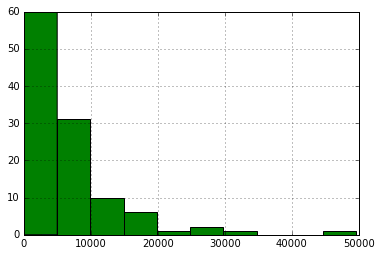

In [102]:
%matplotlib inline
opportunities.groupby('WAS_WON').EstimatedContractValue.hist()

In [81]:
#opportunities.columns
opportunities = opportunities[opportunities.create_date_delta.notnull()]
#opportunities = opportunities[opportunities.FirstDemoDate_delta.notnull()]
#opportunities = opportunities[opportunities.PresentationDate_delta.notnull()]
opportunities = opportunities[opportunities.EstimatedContractValue.notnull()]
opportunities.shape

(100, 48)

In [103]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression

feature_set = opportunities[['create_date_delta', 'closed_date_delta', 'EstimatedContractValue']]
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'C': [10**-i for i in range(-5, 5)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(opportunities), n_folds=3),
    scoring='roc_auc'
)

In [104]:
gs.fit(feature_set, opportunities.WAS_WON)
gs.grid_scores_

[mean: 0.42986, std: 0.10686, params: {'class_weight': None, 'C': 100000},
 mean: 0.36064, std: 0.07225, params: {'class_weight': 'balanced', 'C': 100000},
 mean: 0.42986, std: 0.10686, params: {'class_weight': None, 'C': 10000},
 mean: 0.36064, std: 0.07225, params: {'class_weight': 'balanced', 'C': 10000},
 mean: 0.42986, std: 0.10686, params: {'class_weight': None, 'C': 1000},
 mean: 0.36064, std: 0.07225, params: {'class_weight': 'balanced', 'C': 1000},
 mean: 0.40798, std: 0.09790, params: {'class_weight': None, 'C': 100},
 mean: 0.36064, std: 0.07225, params: {'class_weight': 'balanced', 'C': 100},
 mean: 0.42836, std: 0.10367, params: {'class_weight': None, 'C': 10},
 mean: 0.36918, std: 0.08156, params: {'class_weight': 'balanced', 'C': 10},
 mean: 0.48690, std: 0.07967, params: {'class_weight': None, 'C': 1},
 mean: 0.38605, std: 0.12316, params: {'class_weight': 'balanced', 'C': 1},
 mean: 0.49758, std: 0.09016, params: {'class_weight': None, 'C': 0.1},
 mean: 0.36480, std: 0

In [105]:
print(gs.best_estimator_)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
